In [15]:
import sys, os
import pygeostat as gs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Loading CCG Executable

In [16]:
outdir = 'Output'
gs.mkdir(outdir)
#path to GSLIB executables
exe_dir="../pygeostat/executable/"

gs.PlotStyle['font.size'] = 12
gs.Parameters['data.tmin'] = -998

# Loading data

In [17]:
dfl = gs.ExampleData('point2d_mv')
dfl.head()

X             Y     Var1     Var2     Var3
0  28949.708226  96548.685172  0.78641  2.96716 -1.47010
1  24610.158555  96251.877101  0.54300  2.13614  0.74573
2  27719.964681  90687.703337 -0.39320  0.48682  0.23470
3  26910.320345  92501.863566  0.44938  1.27002 -0.31840
4  21725.601294  92981.211253  1.38558  1.77734  2.40020

# Multivariate Case

## Using GMM

In [18]:
varnum = 3
n_components = 10
max_num_iterations = 100

In [19]:
gmm = gs.Program(program='gmm_fit')

In [20]:
parstr = """    Parameters for GMM_EM
               *********************

START OF PARAMETERS:
{file}                - file with data
{varnum} 3 4 5           - Number of variables and columns
-998 1e21             - trimming limits
{output}               - output file
{n_components}          - number of components
0.0001                   - regularization constant (treat instability)
{max_num_iterations}  - maximum number of iterations for EM algorithm
14641                 - seed number
0                     - fit only homotopic data (1=yes; 0=no)

=================================================================
This program fit a Gaussian mixture to the data based on the EM (Expected maximum liklihood)
algorithm.
"""
gmm.run(parstr=parstr.format(file=dfl.flname,
                             varnum=varnum, 
                             n_components=n_components, 
                             max_num_iterations=max_num_iterations, 
                             output=os.path.join(outdir, 'gmm_fit.out')), 
        liveoutput=False)

Calling:  ['gmm_fit', 'temp']


In [31]:
gmm_util = gs.GmmUtility(gmm_file=os.path.join(outdir, 'gmm_fit.out'), 
                      data=dfl.data, variable_names=['Var1', 'Var2','Var3'])

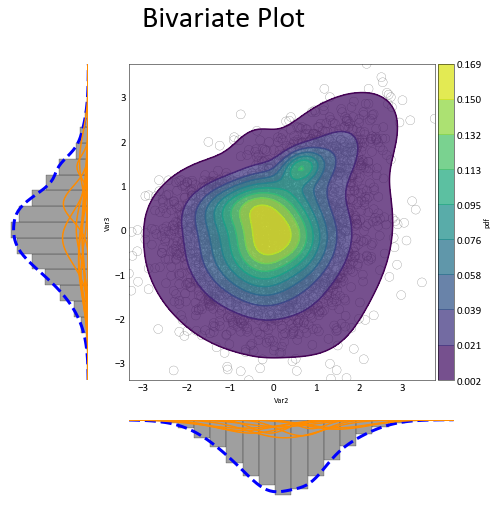

In [11]:
gmm_util.bivariate_plot(var_index=[1,2], cmap='viridis',title='Bivariate Plot',fname='test')

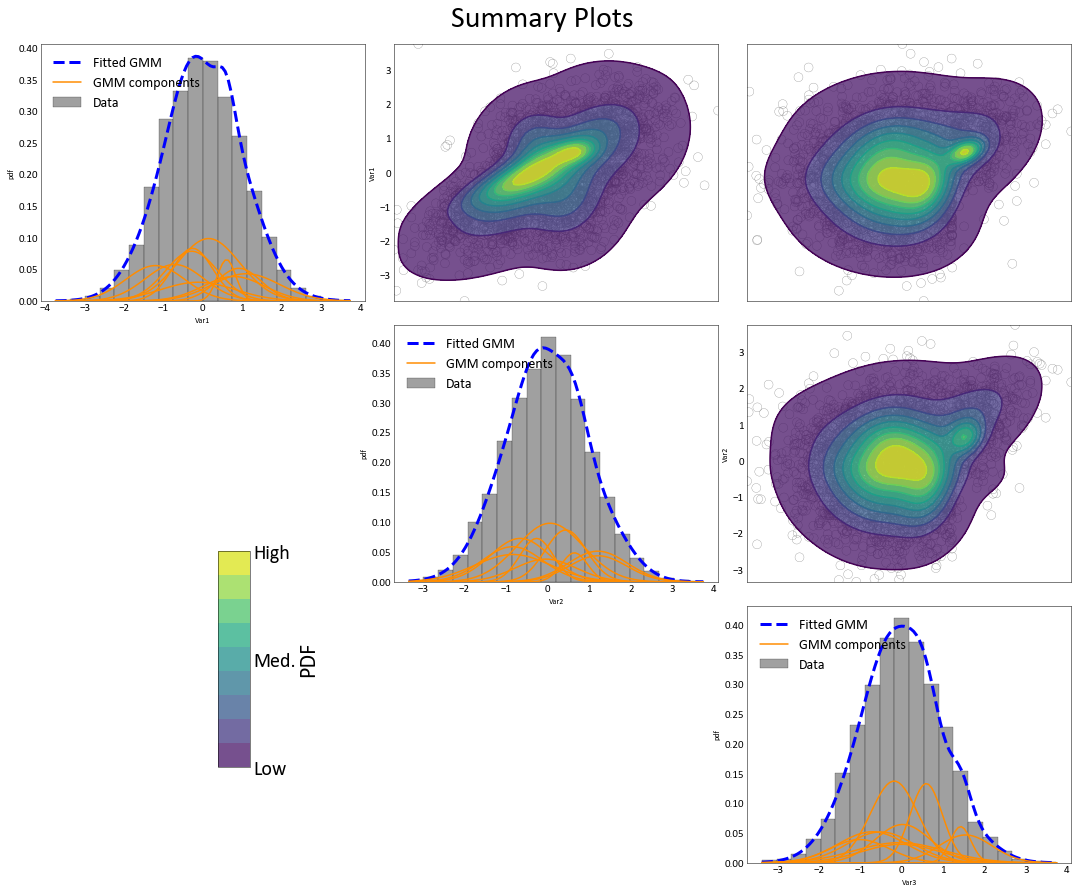

In [12]:
gmm_util.summary_plot(pad=0.1)

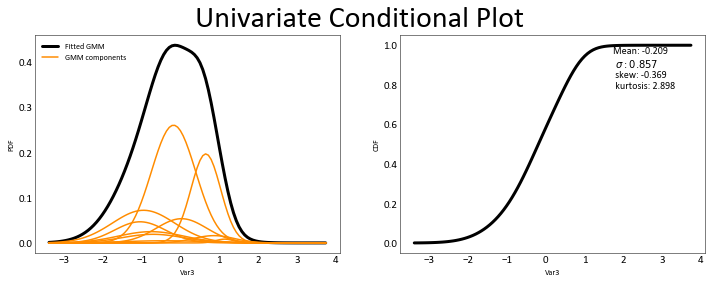

In [13]:
gmm_util.univariate_conditional_plot(conditioning_data=[0, 0,None])

In [32]:
# Clean up
try:
    gs.rmfile('test.png')
    gs.rmfile('temp')
    gs.rmdir(outdir)
except:
    pass